In [ ]:
Using CNN and MNIST dataset, perform digit classification

In [1]:
  import keras
from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


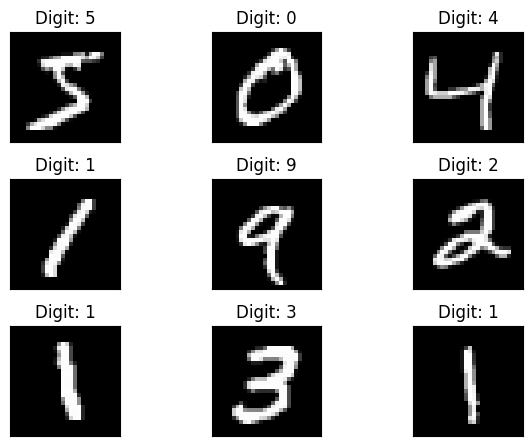

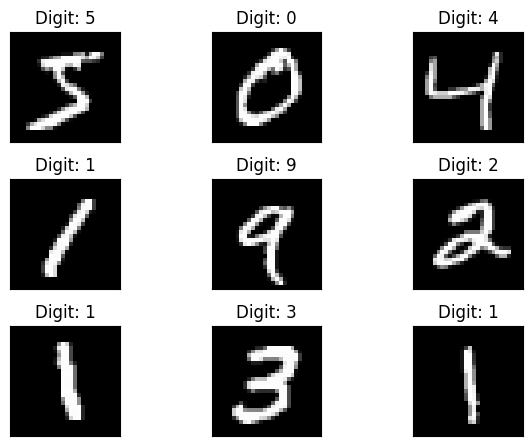

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [6]:
# normalizing the pixel values etc.
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
import keras.backend as k
img_rows, img_cols = 28, 28

if k.image_data_format() == 'channels_first':
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


In [7]:
import keras
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
activation='relu',
input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :)
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#categorical ce since we have multiple classes (10)
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adadelta(),
metrics=['accuracy'])

In [11]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
batch_size=batch_size,
epochs=num_epoch,
verbose=1,
validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 154s 317ms/step - accuracy: 0.1288 - loss: 2.2967 - val_accuracy: 0.2365 - val_loss: 2.2624
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 195s 305ms/step - accuracy: 0.2268 - loss: 2.2566 - val_accuracy: 0.4248 - val_loss: 2.2111
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 302ms/step - accuracy: 0.3295 - loss: 2.2053 - val_accuracy: 0.5533 - val_loss: 2.1389
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 305ms/step - accuracy: 0.4121 - loss: 2.1335 - val_accuracy: 0.6420 - val_loss: 2.0347
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 304ms/step - accuracy: 0.4779 - loss: 2.0309 - val_accuracy: 0.6907 - val_loss: 1.8889
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 309ms/step - accuracy: 0.5269 - loss: 1.8944 - val_accuracy: 0.7186 - val_loss: 1.7014
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 146s 310ms/step - accuracy: 0.5713 - loss: 1.7230 - val_accuracy: 0.7447 - val_loss: 1.4864
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 310ms/step - accuracy: 0.6020 -

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.9525339603424072
Test accuracy: 0.8097000122070312


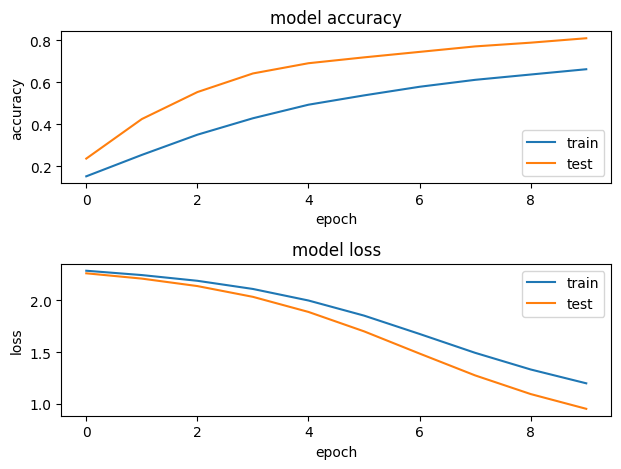

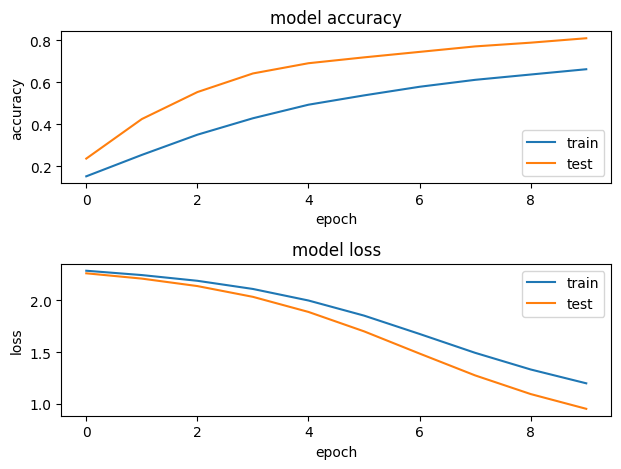

In [15]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

In [ ]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")